In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CSV_FILE = "/home/matt/PycharmProjects/RJI-Photo/df3dimv5.csv"

df = pd.read_csv(CSV_FILE)

ones_df = df.loc[df['code'] == 1][['paths', 'code']]

In [3]:
from PIL import Image
from torchvision import transforms

transform = transforms.Compose([transforms.Resize([480,720])])
img_list = []

for _, data in ones_df.iterrows():
    image = Image.open(data['paths'])
#     image = image.convert('L')
    img_list.append(np.array(transform(image)))
    image.close()
    
img_list = np.stack(img_list)
print(img_list.shape)

(310, 480, 720, 3)


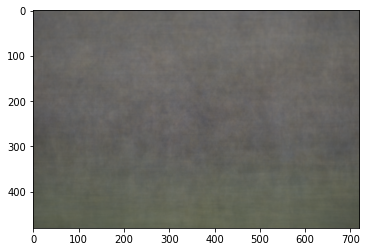

In [4]:
%matplotlib inline

mean_img = np.round(np.mean(img_list, axis=0)).astype(int)

plt.imshow(mean_img, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

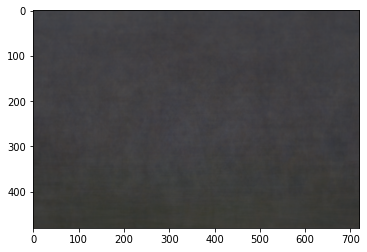

In [5]:
%matplotlib inline

std_img = np.round(np.std(img_list, axis=0)).astype(int)

plt.imshow(std_img, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

In [6]:
sevens_df = df.loc[df['code'] == 7][['paths', 'code']]

In [7]:
transform = transforms.Compose([transforms.Resize([480,720])])
sev_img_list = []

for _, data in sevens_df.iterrows():
    image = Image.open(data['paths'])
#     image = image.convert('L')
    sev_img_list.append(np.array(transform(image)))
    image.close()
    
sev_img_list = np.stack(sev_img_list)

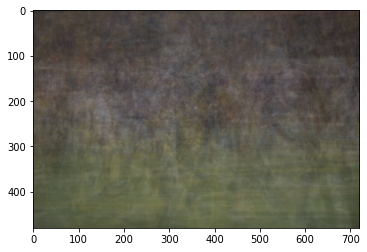

In [8]:
%matplotlib inline

sev_mean_img = np.round(np.mean(sev_img_list, axis=0)).astype(int)

plt.imshow(sev_mean_img, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

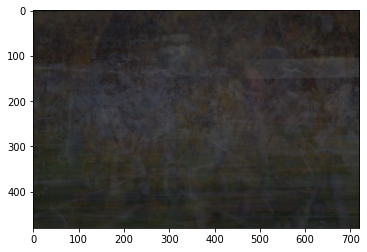

In [9]:
%matplotlib inline

sev_std_img = np.round(np.std(sev_img_list, axis=0)).astype(int)

plt.imshow(sev_std_img, cmap='Greys_r', vmin=0, vmax=255)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


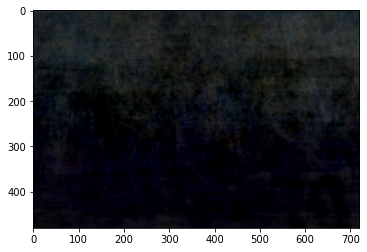

In [10]:
combo = mean_img - sev_mean_img
plt.imshow(combo, vmin=0, vmax=255, cmap='bwr')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


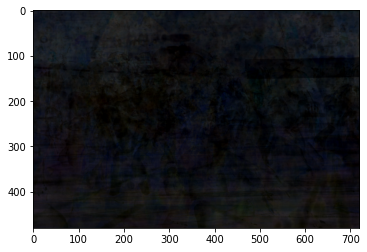

In [11]:
std_combo = std_img - sev_std_img
plt.imshow(std_combo, vmin=0, vmax=255, cmap='bwr')
plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.7, whiten=True)
print(img_list.shape)
pca.fit(img_list.reshape((310, -1)))
print(pca.components_.shape)

(310, 480, 720, 3)
(39, 1036800)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

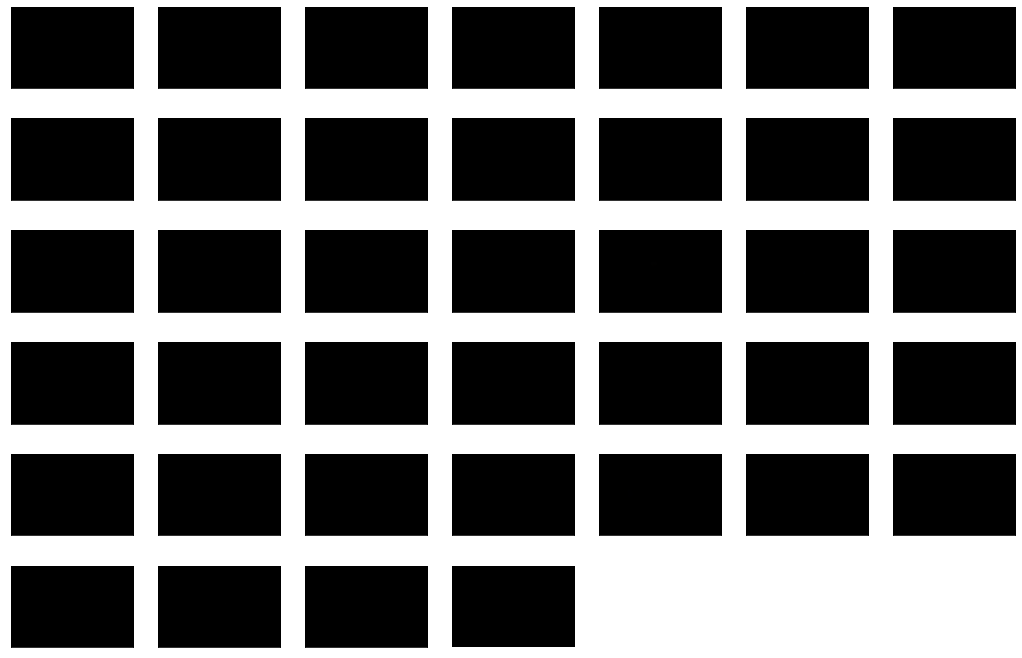

In [16]:
from math import ceil

def plot_pca(pca, size = (480, 720, 3)):
    # plot eigenimages in a grid
    n = pca.n_components_
    fig = plt.figure(figsize=(18, 12))
    r = int(n**.5)
    c = ceil(n/ r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i + 1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), 
                  cmap='Greys_r', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()
    
plot_pca(pca)

(25, 480, 720, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(12, 1036800)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


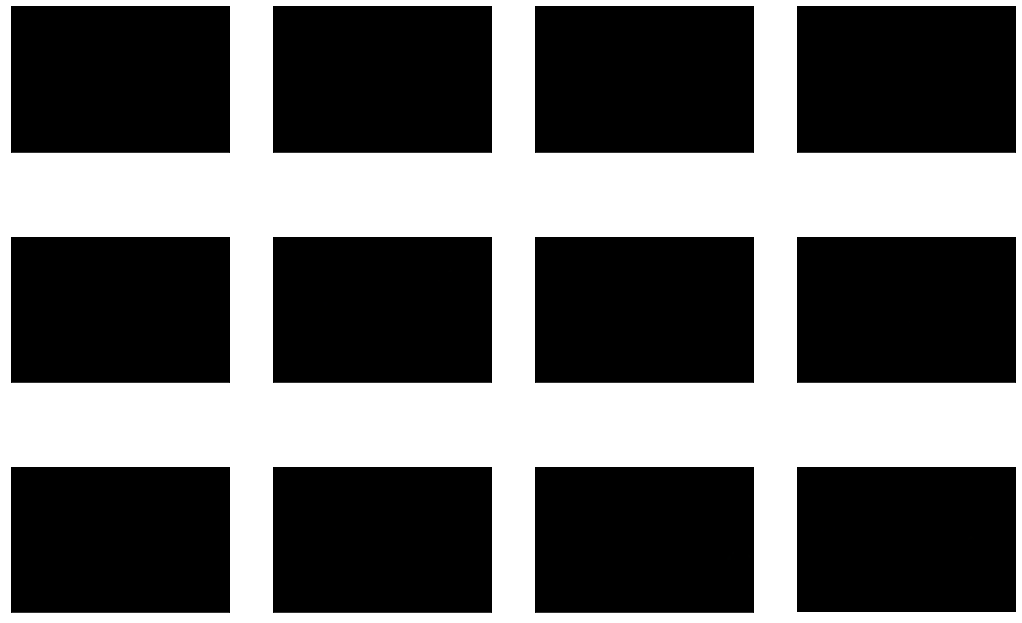

In [17]:
from sklearn.decomposition import PCA

sev_pca = PCA(n_components=0.7, whiten=True)
print(sev_img_list.shape)
sev_pca.fit(sev_img_list.reshape((25, -1)))
print(sev_pca.components_.shape)

plot_pca(sev_pca)